# Create Potential Fast Transient List

Author: Melissa Graham & Midori Rollins

Identify potential fast transients from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans, peak magnitudes, amplitudes, rise slopes and rise times.

Write the list of potential fast transients to `potential_fast_transients_list.txt`.

Save the plot of every potential fast transient lightcurve in the folder `all_potential_fast_transients_plots/`.

## Set up and read in data

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i

In [23]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

### Load the candidate lightcurves

In [5]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

## Constrain the rise slopes & times

From Maria Drout's <a href="https://arxiv.org/abs/1405.3668">paper</a>, I find a constraints I want to implement:
>The transient must rise by 1.5 mag in the 9 days immediately prior to observed maximum light.

To do this, I first calculate the rise slopes and rise times for each candidate in each filter.

In [22]:
%%time

# define lists and arrays
gslope = []
rslope = []
islope = []
grise_time = []
rrise_time = []
irise_time = []
gmin_date = np.zeros(len(paramLC_candid))
rmin_date = np.zeros(len(paramLC_candid))
imin_date = np.zeros(len(paramLC_candid))

for i in range(len(paramLC_candid)):
    
    ### g band 
    # retrieve mjd date of the peak magnitude of each candidate in g-band
    gtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g')))[0]
    if len(gtx) > 1: 
        gtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mag ==candLC_mag[gtx].min()))[0] 
        gmin_date[i] = candLC_mjd[gtx2][0]
    gtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mjd <= gmin_date[i]))[0]
    if len(candLC_mag[gtx3]) > 1:
    # calculate rise time and rise slope in g-band
        grise_mag = candLC_mag[gtx3[0]] - candLC_mag[gtx3[-1]] # get change in mag between first detection and peak
        grise_t = candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]] # get change in time between first detection and peak
        grise_time.append(candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]])
        gslope.append(grise_mag/grise_t) # get rise slope
    else:
        grise_mag = -99.0
        grise_time.append(99.0)
        gslope.append(-99.0)
    
    ### r band
    # retrieve mjd date of the peak magnitude of each candidate in r-band
    rtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r')))[0]
    if len(rtx) > 1: 
        rtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mag ==candLC_mag[rtx].min()))[0]
        rmin_date[i] = candLC_mjd[rtx2][0]
    rtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mjd <= rmin_date[i]))[0]
    if len(candLC_mag[rtx3]) > 1:
    # calculate rise time and rise slope in r-band
        rrise_mag = candLC_mag[rtx3[0]] - candLC_mag[rtx3[-1]] # get change in mag between first detection and peak
        rrise_t = candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]] # get change in time between first detection and peak
        rrise_time.append(candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]]) 
        rslope.append(rrise_mag/rrise_t) # get rise slope
    else:
        rrise_mag = -99.0
        rrise_time.append(99.0)
        rslope.append(-99.0)
    
    ### i band
    # retrieve mjd date of the peak magnitude of each candidate in i-band
    itx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i')))[0]
    if len(itx) > 1: 
        itx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mag ==candLC_mag[itx].min()))[0]
        imin_date[i] = candLC_mjd[itx2][0]
    itx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mjd <= imin_date[i]))[0]
    if len(candLC_mag[itx3]) > 1:
    # calculate rise time and rise slope in i-band
        irise_mag = candLC_mag[itx3[0]] - candLC_mag[itx3[-1]] # get change in mag between first detection and peak
        irise_t = candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]] # get change in time between first detection and peak
        irise_time.append(candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]])
        islope.append(irise_mag/irise_t) # get rise slope
    else:
        irise_mag = -99.0
        irise_time.append(99.0)
        islope.append(-99.0)
        
gslope = np.array(gslope)
rslope = np.array(rslope)
islope = np.array(islope)
grise_time = np.array(grise_time)
rrise_time = np.array(rrise_time)
irise_time = np.array(irise_time)

del gtx, gtx2, gtx3, rtx, rtx2, rtx3, itx, itx2,itx3

CPU times: user 1min 47s, sys: 15.3 ms, total: 1min 47s
Wall time: 1min 47s


## Identify potential fast transients
We constrain the timespans, peak magnitudes, amplitudes, rise times, and rise slopes:
 * Short timespan (4 to 40 days) in **every filter**
 * Reaches a peak of at least 22 mag in **any filter**
 * Has an amplitude of at least 0.5 mag in **any filter**
 * Prior to peak, rises in brightness with a slope of at least 1.5 mags/9 days in at least **2 filters**
 * Prior to peak, rises in brightness in less than 10 days in at least **2 filters**

If a candidate satisfies all above constraints, we deem it a potential fast transient.

In [24]:
# flag which candidates satisfy constraints in at least 2 bands
paramLC_potft = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]

for t in tx:
    cntr = 0
    if (gslope[t] >= 1.5/9) & (grise_time[t] < 10):
        cntr += 1
    if (rslope[t] >= 1.5/9) & (rrise_time[t] < 10):
        cntr += 1
    if (islope[t] >= 1.5/9) & (irise_time[t] < 10):
        cntr += 1

    if (cntr == 2) | (cntr == 3):
        paramLC_potft[t] = 1
    
    del cntr
del tx

tx = np.where( (paramLC_potft == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
del tx
tx = np.where( (paramLC_potft == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
del tx

Number of potential fast transients in COSMOS:  0
Number of potential fast transients in ELAIS:  1


### Write the list of potential fast transients to file

In [10]:
fout = open('potential_fast_transients_list.dat', 'w')
tx = np.where(paramLC_potft == 1)[0]
for x in tx:
    fout.write(paramLC_candid[x]+'\n')
fout.close()
print('Number of potential fast transients: ', len(tx))
del tx

Number of potential fast transients:  1


### Plot the potential fast transient lightcurves

DC22icaog shows both a rise and fall, just over two weeks. This looks like a real fast transient.

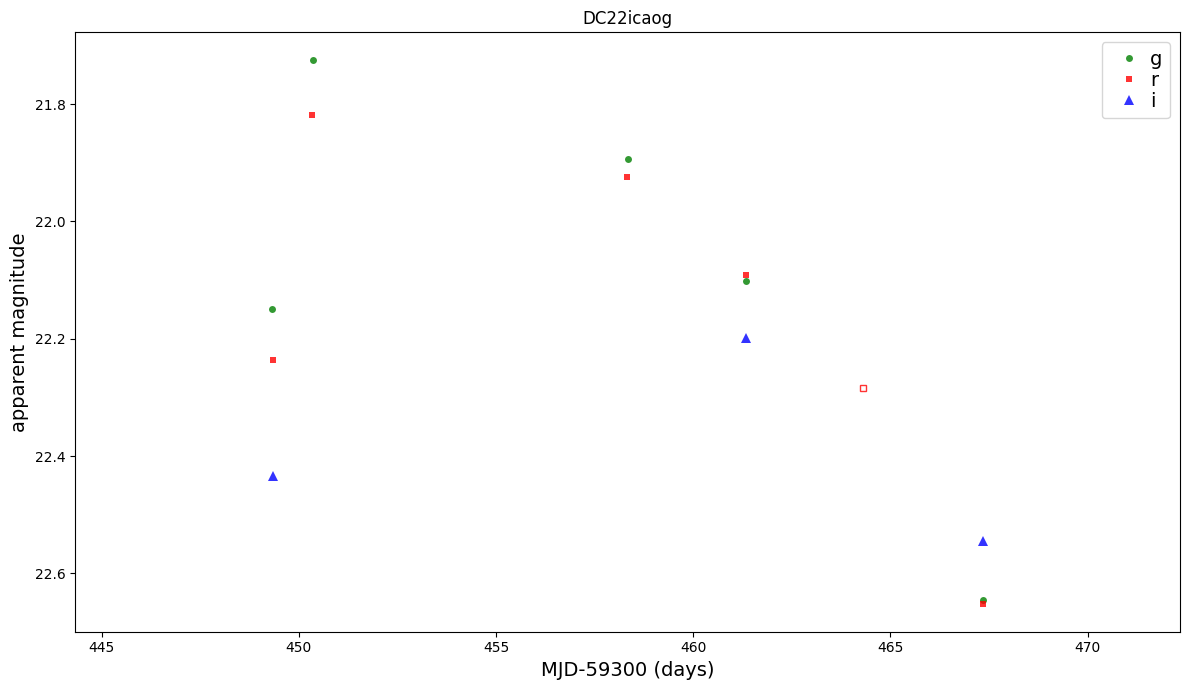

In [15]:
sx = np.where(paramLC_potft == 1)[0]
np.random.shuffle(sx)

plt.figure(figsize=(12,7))

s = 0
for i in range(1):
    plt.ylabel('apparent magnitude', fontsize=14)
    for j in range(1):
        for f,filt in enumerate(all_filters):
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                         all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            if f == 0:
                xmin = 60000.
                xmax = 0.
                if (len(cx0) > 0):
                    xmin = np.min(candLC_mjd[cx0])
                    xmax = np.max(candLC_mjd[cx0])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
                    xmax = np.max([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
            elif f > 0:
                if (len(cx0) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0])])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                
            del cx0, cx1, cx2
        plt.gca().invert_yaxis()
        plt.xlim([xmin-59300.-5, xmax-59300.+5])
        del xmin, xmax
        plt.title(paramLC_candid[sx[s]])
        s += 1

plt.legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    plt.xlabel('MJD-59300 (days)', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

### Plot slope lines for the potential fast transient, DC22icaog, lightcurve

We ensure the calculated rise slope matches the lightcurve data.

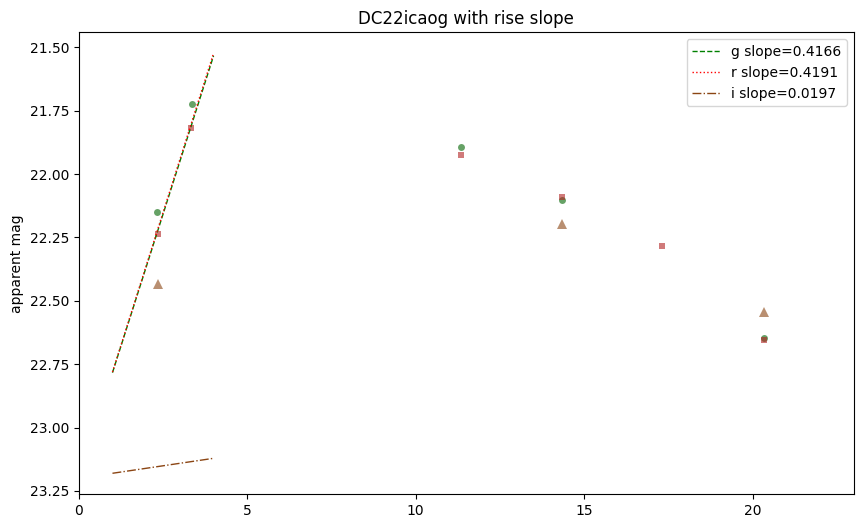

In [19]:
tx = np.where((((paramLC_tspan_g >= 4) & (paramLC_tspan_g <= 40)) & 
               ((paramLC_tspan_r >= 4) & (paramLC_tspan_r <= 40)) & 
               ((paramLC_tspan_i >= 4) & (paramLC_tspan_i <= 40))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
tx2 = np.where((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))

gtx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'g'))
rtx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'r'))
itx = np.where((candLC_candid == 'DC22icaog') & (candLC_filter == 'i'))

plt.figure(figsize=(10,6))

plt.plot(candLC_mjd[gtx]-59747., candLC_mag[gtx], all_fshapes[0], ms=all_fsizes[0], mew=0, alpha=0.6, color=clr[0])
plt.plot(candLC_mjd[rtx]-59747., candLC_mag[rtx], all_fshapes[1], ms=all_fsizes[1], mew=0, alpha=0.6, color=clr[1])
plt.plot(candLC_mjd[itx]-59747., candLC_mag[itx], all_fshapes[2], ms=all_fsizes[2], mew=0, alpha=0.6, color=clr[2])
del gtx, rtx, itx

x = [1, 2, 3, 4]
gy = [-(gslope[tx][tx2][0]*i)+ 23.2 for i in x]
ry = [-(rslope[tx][tx2][0]*i)+ 23.2 for i in x]
iy = [-(islope[tx][tx2][0]*i)+ 23.2 for i in x]

plt.plot(x, gy, c='green', lw=1, ls='dashed', label =f'g slope={gslope[tx][tx2][0]:.4f}')
plt.plot(x, ry, c='red', lw=1, ls='dotted', label =f'r slope={rslope[tx][tx2][0]:.4f}')
plt.plot(x, iy, c='saddlebrown', lw=1, ls='dashdot', label =f'i slope={islope[tx][tx2][0]:.4f}')
del x, gy, ry, iy, tx, tx2
plt.ylabel('apparent mag')
plt.title('DC22icaog with rise slope')
plt.xlim(0, 23)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

### Save individual plots as PNG files

In [20]:
sx = np.where(paramLC_potft == 1)[0]
plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))
    
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
    cx = np.where(candLC_candid == paramLC_candid[sx[x]])[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    del cx
    plt.gca().invert_yaxis()
    plt.title(paramLC_candid[sx[x]])
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    plt.xlabel('MJD-59300 (days)', fontsize=14)
    plt.ylabel('apparent magnitude', fontsize=14)
    plt.savefig('all_potential_fast_transients_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx